<a href="https://colab.research.google.com/github/vineelbhatti/FantasyFootball/blob/main/FantasyFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
#Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [298]:
#Open full, unmodified dataset
full_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/FantasyFootballData/adp_merged_7_17.csv")
print(full_df.head())

   Year             name position team  adp  PlayerID
0  2017    David Johnson       RB  ARI  1.3  JohnDa08
1  2017     Le'Veon Bell       RB  PIT  2.3  BellLe00
2  2017    Antonio Brown       WR  PIT  3.7  BrowAn04
3  2017      Julio Jones       WR  ATL  5.7  JoneJu02
4  2017  Ezekiel Elliott       RB  DAL  6.2  ElliEz00


In [299]:
#Check columns of full dataset
full_df.columns

Index(['Year', 'name', 'position', 'team', 'adp', 'PlayerID'], dtype='object')

In [300]:
'''
The first task will be to the number of first round picks
per position by year.
'''

'\nThe first task will be to the number of first round picks\nper position by year.\n'

In [301]:
#For now, name, team, and PlayerID are unnecessary,
#so we can create a new dataframe without these columns

In [302]:
#axis=0 means that we are removing rows
#axis=1 means that we are removing columns
task1_df = full_df.drop(["name", "team", "PlayerID"], axis=1)
task1_df.columns

Index(['Year', 'position', 'adp'], dtype='object')

In [303]:
#Assuming a 10 team league, we can drop all entries with an adp greater than 10.
#We can also split the dataframe by year

In [304]:
task1_df = task1_df[task1_df['adp'] <= 40]
print(task1_df.head())

   Year position  adp
0  2017       RB  1.3
1  2017       RB  2.3
2  2017       WR  3.7
3  2017       WR  5.7
4  2017       RB  6.2


In [305]:
df_qb = task1_df[task1_df['position'] == "QB"]
df_rb = task1_df[task1_df['position'] == "RB"]
df_wr = task1_df[task1_df['position'] == "WR"]
df_te = task1_df[task1_df['position'] == "TE"]

<Axes: >

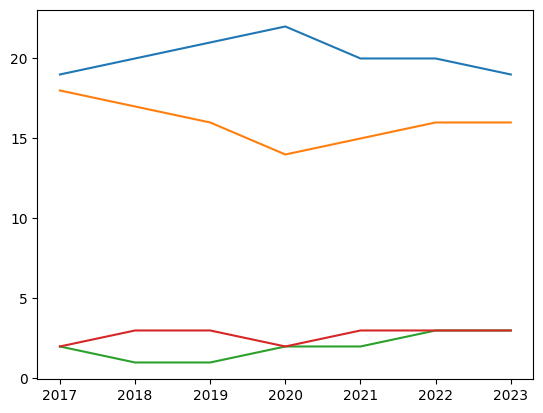

In [306]:
df_rb.Year.value_counts()[df_rb.Year.unique()].plot(kind="line")
df_wr.Year.value_counts()[df_wr.Year.unique()].plot(kind="line")
df_qb.Year.value_counts()[df_qb.Year.unique()].plot(kind="line")
df_te.Year.value_counts()[df_te.Year.unique()].plot(kind="line")

In [307]:
'''Task 2'''

'Task 2'

In [308]:
df_2022 = full_df[full_df['Year'] == 2022]
df_2021 = full_df[full_df['Year'] == 2021]
df_2020 = full_df[full_df['Year'] == 2020]
df_2019 = full_df[full_df['Year'] == 2019]
df_2018 = full_df[full_df['Year'] == 2018]


df_stats = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/FantasyFootballData/fantasy_merged_7_17.csv")
df_stats22 = df_stats[df_stats['Year'] == 2022]
df_stats21 = df_stats[df_stats['Year'] == 2021]
df_stats20 = df_stats[df_stats['Year'] == 2020]
df_stats19 = df_stats[df_stats['Year'] == 2019]
df_stats18 = df_stats[df_stats['Year'] == 2018]

df_stats22.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
2811,1,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,...,1,6,6.00,0,5,0,417.4,MahoPa00,1.0,2022
2812,2,Josh Allen,BUF,QB,26,16,16,359,567,4283,...,0,0,NaN,0,13,5,395.5,AlleJo02,2.0,2022
2813,3,Jalen Hurts,PHI,QB,24,15,15,306,460,3701,...,0,0,NaN,0,9,2,378.0,HurtJa00,3.0,2022
2814,4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,...,107,722,6.75,5,5,3,372.7,EkelAu00,1.0,2022
2815,5,Justin Jefferson,MIN,WR,23,17,17,2,2,34,...,128,1809,14.13,8,0,0,368.7,JeffJu00,1.0,2022


In [309]:
df_2022.rename(columns={'name':'Player'}, inplace=True)
df_2021.rename(columns={'name':'Player'}, inplace=True)
df_2020.rename(columns={'name':'Player'}, inplace=True)
df_2019.rename(columns={'name':'Player'}, inplace=True)
df_2018.rename(columns={'name':'Player'}, inplace=True)

df_2022.head()

<ipython-input-309-c20857916052>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-309-c20857916052>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-309-c20857916052>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-309-c20857916052>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

,Year,Player,position,team,adp,PlayerID
858,2022,Jonathan Taylor,RB,IND,1.3,TaylJo02
859,2022,Christian McCaffrey,RB,SF,2.4,McCaCh01
860,2022,Austin Ekeler,RB,LAC,2.7,EkelAu00
861,2022,Derrick Henry,RB,TEN,4.3,HenrDe00
862,2022,Justin Jefferson,WR,MIN,4.6,JeffJu00


In [310]:
df_2022 = df_2022[df_2022['position'] != "QB"]
df_2021 = df_2021[df_2021['position'] != "QB"]
df_2020 = df_2020[df_2020['position'] != "QB"]
df_2019 = df_2019[df_2019['position'] != "QB"]
df_2018 = df_2018[df_2018['position'] != "QB"]

In [311]:
df_final22 = pd.merge(df_stats22, df_2022, on='Player')
df_final21 = pd.merge(df_stats21, df_2021, on='Player')
df_final20 = pd.merge(df_stats20, df_2020, on='Player')
df_final19 = pd.merge(df_stats19, df_2019, on='Player')
df_final18 = pd.merge(df_stats18, df_2018, on='Player')

#df_final22.head()

In [312]:
#sns.scatterplot(x = "adp", y = "PPR", data=df_final22)
#sns.scatterplot(x = "adp", y = "PPR", data=df_final21)

fig = px.scatter(x=df_final22["adp"], y=df_final22["PPR"], color = df_final22["team"], hover_name = df_final22["Player"], symbol = df_final22["position"], trendline = "ols", trendline_scope = "overall")
fig2 = px.scatter(x=df_final21["adp"], y=df_final21["PPR"], color = df_final21["team"], hover_name = df_final21["Player"], symbol = df_final21["position"], trendline = "ols", trendline_scope = "overall")
fig3 = px.scatter(x=df_final20["adp"], y=df_final20["PPR"], color = df_final20["team"], hover_name = df_final20["Player"], symbol = df_final20["position"], trendline = "ols", trendline_scope = "overall")
fig4 = px.scatter(x=df_final19["adp"], y=df_final19["PPR"], color = df_final19["team"], hover_name = df_final19["Player"], symbol = df_final19["position"], trendline = "ols", trendline_scope = "overall")
fig5 = px.scatter(x=df_final18["adp"], y=df_final18["PPR"], color = df_final18["team"], hover_name = df_final18["Player"], symbol = df_final18["position"], trendline = "ols", trendline_scope = "overall")

fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

In [313]:
'''Task 3'''

'Task 3'

In [314]:
full_df.rename(columns={'name':'Player'}, inplace=True)
df_allyears = pd.merge(full_df, df_stats, on = ["Player", "Year"])
df_allyears.rename(columns={'team':'Team'}, inplace=True)

df_allyears.head()

,Year,Player,position,Team,adp,PlayerID_x,Rk,Tm,FantPos,Age,...,Tgt,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID_y,PosRk
0,2017,David Johnson,RB,ARI,1.3,JohnDa08,407,ARI,RB,26,...,9,6,67,11.17,0,2,1,13.0,JohnDa08,115.0
1,2017,Le'Veon Bell,RB,PIT,2.3,BellLe00,3,PIT,RB,25,...,106,85,655,7.71,2,3,2,341.6,BellLe00,2.0
2,2017,Antonio Brown,WR,PIT,3.7,BrowAn04,5,PIT,WR,29,...,163,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0
3,2017,Julio Jones,WR,ATL,5.7,JoneJu02,26,ATL,WR,28,...,148,88,1444,16.41,3,0,0,251.9,JoneJu02,7.0
4,2017,Ezekiel Elliott,RB,DAL,6.2,ElliEz00,51,DAL,RB,22,...,38,26,269,10.35,2,1,1,203.2,ElliEz00,12.0


In [315]:
fig = px.scatter(x=df_allyears["adp"], y=df_allyears["PPR"], color = df_allyears["Year"], hover_name = df_allyears["Player"], symbol = df_allyears["position"], trendline = "ols", trendline_scope = "overall")
fig.show()

In [316]:
win = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/FantasyFootballData/Team Win Percentage - Sheet1 (2).csv")

df_win = pd.merge(df_allyears, win, on = ["Team", "Year"])
df_winQB = df_win[df_win['position'] == "QB"]
df_win = df_win[df_win['position'] != "QB"]

df_win.tail()

,Year,Player,position,Team,adp,PlayerID_x,Rk,Tm,FantPos,Age,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID_y,PosRk,WinP
932,2022,Nico Collins,WR,HOU,153.8,CollNi00,182,HOU,WR,23,...,37,481,13.00,2,0,0,97.1,CollNi00,77.0,0.206
933,2022,Damien Harris,RB,NE,59.8,HarrDa06,188,NWE,RB,25,...,17,97,5.71,0,0,0,90.9,HarrDa06,48.0,0.471
934,2022,Rhamondre Stevenson,RB,NE,76.0,StevRh00,29,NWE,RB,24,...,69,421,6.10,1,4,1,249.1,StevRh00,7.0,0.471
935,2022,Hunter Henry,TE,NE,134.1,HenrHu00,168,NWE,TE,28,...,41,509,12.41,2,0,0,103.9,HenrHu00,22.0,0.471
936,2022,DeVante Parker,WR,NE,134.9,ParkDe01,170,NWE,WR,29,...,31,539,17.39,3,0,0,102.9,ParkDe01,70.0,0.471


In [317]:
df_winRB = df_win[df_win['position'] == "RB"]
df_winWR = df_win[df_win['position'] == "WR"]

In [318]:
fig_3d = px.scatter_3d(df_win, x=df_win["WinP"], y=df_win["adp"], z=df_win["PPR"], color=df_win["position"], hover_name = df_win["Player"], hover_data=[df_win["Year"], df_win["Team"]])
fig_3d.update_traces(marker=dict(size=4))

fig_3d.show()

In [319]:
fig_3dRB = px.scatter_3d(df_winRB, x=df_winRB["WinP"], y=df_winRB["adp"], z=df_winRB["PPR"], color=df_winRB["position"], hover_name = df_winRB["Player"], hover_data=[df_winRB["Year"], df_winRB["Team"]])
fig_3dRB.update_traces(marker=dict(size=4))

fig_3dWR = px.scatter_3d(df_winWR, x=df_winWR["WinP"], y=df_winWR["adp"], z=df_winWR["PPR"], color=df_winWR["position"], hover_name = df_winWR["Player"], hover_data=[df_winWR["Year"], df_winWR["Team"]])
fig_3dWR.update_traces(marker=dict(size=4))

fig_3dQB = px.scatter_3d(df_winQB, x=df_winQB["WinP"], y=df_winQB["adp"], z=df_winQB["PPR"], color=df_winQB["position"], hover_name = df_winQB["Player"], hover_data=[df_winQB["Year"], df_winQB["Team"]])
fig_3dQB.update_traces(marker=dict(size=4))

fig_3dRB.show()

In [320]:
fig_3dWR.show()

In [321]:
fig_3dQB.show()

In [322]:
'''Task 4'''

'Task 4'

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [324]:
enc = LabelEncoder()
enc.fit(df_win['position'])
df_win['position_enc'] = enc.transform(df_win['position'])

In [325]:
X = df_win[["position_enc", "adp", "WinP"]]
Y = df_win["PPR"]

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [327]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [328]:
print(rf_model.feature_importances_)

[0.06757951 0.69447887 0.23794162]


In [329]:
y_predictions = rf_model.predict(X_test)

In [330]:
mse = mean_squared_error(y_test, y_predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 5987.0851088123945
R-squared: 0.11439683695398495


In [331]:
df_win["RFPred"] = rf_model.predict(X)

In [332]:
data23 = full_df[full_df["Year"] == 2023]
data23 = data23[data23["position"] != "QB"]
data23.rename(columns={'team':'Team'}, inplace=True)
data23 = pd.merge(data23, win, on = ["Team", "Year"])
data23.head()

,Year,Player,position,Team,adp,PlayerID,WinP
0,2023,Christian McCaffrey,RB,SF,1.5,McCaCh01,0.75
1,2023,Deebo Samuel,WR,SF,31.8,SamuDe00,0.75
2,2023,George Kittle,TE,SF,49.5,KittGe00,0.75
3,2023,Brandon Aiyuk,WR,SF,72.0,AiyuBr00,0.75
4,2023,Elijah Mitchell,RB,SF,97.4,MitcEl00,0.75


In [333]:
data23['position_enc'] = enc.transform(data23['position'])
data23.rename(columns={'name':'Player'}, inplace=True)
test_data23 = data23[["position_enc", "adp", "WinP"]]

test_data23.head()

,position_enc,adp,WinP
0,0,1.5,0.75
1,2,31.8,0.75
2,1,49.5,0.75
3,2,72.0,0.75
4,0,97.4,0.75


In [334]:
rf_pred = rf_model.predict(test_data23)

In [335]:
data23["PredPPR"] = rf_pred
data23.head()

,Year,Player,position,Team,adp,PlayerID,WinP,position_enc,PredPPR
0,2023,Christian McCaffrey,RB,SF,1.5,McCaCh01,0.75,0,220.950
1,2023,Deebo Samuel,WR,SF,31.8,SamuDe00,0.75,2,270.609
2,2023,George Kittle,TE,SF,49.5,KittGe00,0.75,1,152.280
3,2023,Brandon Aiyuk,WR,SF,72.0,AiyuBr00,0.75,2,147.997
4,2023,Elijah Mitchell,RB,SF,97.4,MitcEl00,0.75,0,182.434


In [336]:
data23.head(20)

,Year,Player,position,Team,adp,PlayerID,WinP,position_enc,PredPPR
0,2023,Christian McCaffrey,RB,SF,1.5,McCaCh01,0.750,0,220.950
1,2023,Deebo Samuel,WR,SF,31.8,SamuDe00,0.750,2,270.609
2,2023,George Kittle,TE,SF,49.5,KittGe00,0.750,1,152.280
3,2023,Brandon Aiyuk,WR,SF,72.0,AiyuBr00,0.750,2,147.997
4,2023,Elijah Mitchell,RB,SF,97.4,MitcEl00,0.750,0,182.434
5,2023,Justin Jefferson,WR,MIN,1.7,JeffJu00,0.438,2,209.169
6,2023,Dalvin Cook,RB,MIN,32.7,CookDa01,0.438,0,176.031
7,2023,T.J. Hockenson,TE,MIN,37.1,HockTJ00,0.438,1,205.889
8,2023,Alexander Mattison,RB,MIN,39.5,MattAl01,0.438,0,156.264
9,2023,K.J. Osborn,WR,MIN,157.3,OsboKJ00,0.438,2,122.433


In [337]:
import xgboost

In [338]:
XGB_model = xgboost.XGBRegressor()

In [339]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [340]:
df_win["XGBPred"] = XGB_model.predict(X)

df_win.head(15)

,Year,Player,position,Team,adp,PlayerID_x,Rk,Tm,FantPos,Age,...,RecTD,Fmb,FL,PPR,PlayerID_y,PosRk,WinP,position_enc,RFPred,XGBPred
0,2017,David Johnson,RB,ARI,1.3,JohnDa08,407,ARI,RB,26,...,0,2,1,13.0,JohnDa08,115.0,0.500,0,72.6180,13.503722
1,2017,Larry Fitzgerald,WR,ARI,48.4,FitzLa00,20,ARI,WR,34,...,6,1,1,261.4,FitzLa00,4.0,0.500,2,218.0290,182.278946
2,2017,Adrian Peterson,RB,ARI,69.9,PeteAd01,203,2TM,RB,32,...,0,3,2,78.9,PeteAd01,61.0,0.500,0,110.4180,106.823708
3,2017,John Brown,WR,ARI,108.6,BrowJo02,219,ARI,WR,27,...,3,0,0,69.9,BrowJo02,87.0,0.500,2,103.6610,77.467934
5,2017,Le'Veon Bell,RB,PIT,2.3,BellLe00,3,PIT,RB,25,...,2,3,2,341.6,BellLe00,2.0,0.813,0,332.9760,356.847168
6,2017,Antonio Brown,WR,PIT,3.7,BrowAn04,5,PIT,WR,29,...,9,4,0,310.3,BrowAn04,1.0,0.813,2,300.9878,309.275787
7,2017,Martavis Bryant,WR,PIT,40.9,BryaMa00,127,PIT,WR,26,...,3,0,0,132.5,BryaMa00,49.0,0.813,2,171.5000,147.849899
9,2017,Julio Jones,WR,ATL,5.7,JoneJu02,26,ATL,WR,28,...,3,0,0,251.9,JoneJu02,7.0,0.625,2,268.8230,217.108490
10,2017,Devonta Freeman,RB,ATL,7.0,FreeDe00,56,ATL,RB,25,...,1,4,1,200.2,FreeDe00,14.0,0.625,0,249.7460,232.711014
12,2017,Tevin Coleman,RB,ATL,73.2,ColeTe01,86,ATL,RB,24,...,3,1,0,167.7,ColeTe01,22.0,0.625,0,98.4920,66.502182


In [341]:
from sklearn.svm import SVR

In [342]:
svm_model = SVR()

In [343]:
svm_model.fit(X_train, y_train)

SVR()

In [344]:
df_win["SVMPred"] = svm_model.predict(X)

df_win.head(15)

,Year,Player,position,Team,adp,PlayerID_x,Rk,Tm,FantPos,Age,...,Fmb,FL,PPR,PlayerID_y,PosRk,WinP,position_enc,RFPred,XGBPred,SVMPred
0,2017,David Johnson,RB,ARI,1.3,JohnDa08,407,ARI,RB,26,...,2,1,13.0,JohnDa08,115.0,0.500,0,72.6180,13.503722,194.183347
1,2017,Larry Fitzgerald,WR,ARI,48.4,FitzLa00,20,ARI,WR,34,...,1,1,261.4,FitzLa00,4.0,0.500,2,218.0290,182.278946,177.588008
2,2017,Adrian Peterson,RB,ARI,69.9,PeteAd01,203,2TM,RB,32,...,3,2,78.9,PeteAd01,61.0,0.500,0,110.4180,106.823708,161.739905
3,2017,John Brown,WR,ARI,108.6,BrowJo02,219,ARI,WR,27,...,0,0,69.9,BrowJo02,87.0,0.500,2,103.6610,77.467934,134.954833
5,2017,Le'Veon Bell,RB,PIT,2.3,BellLe00,3,PIT,RB,25,...,3,2,341.6,BellLe00,2.0,0.813,0,332.9760,356.847168,194.184003
6,2017,Antonio Brown,WR,PIT,3.7,BrowAn04,5,PIT,WR,29,...,4,0,310.3,BrowAn04,1.0,0.813,2,300.9878,309.275787,194.190173
7,2017,Martavis Bryant,WR,PIT,40.9,BryaMa00,127,PIT,WR,26,...,0,0,132.5,BryaMa00,49.0,0.813,2,171.5000,147.849899,182.300227
9,2017,Julio Jones,WR,ATL,5.7,JoneJu02,26,ATL,WR,28,...,0,0,251.9,JoneJu02,7.0,0.625,2,268.8230,217.108490,194.102300
10,2017,Devonta Freeman,RB,ATL,7.0,FreeDe00,56,ATL,RB,25,...,4,1,200.2,FreeDe00,14.0,0.625,0,249.7460,232.711014,193.978906
12,2017,Tevin Coleman,RB,ATL,73.2,ColeTe01,86,ATL,RB,24,...,1,0,167.7,ColeTe01,22.0,0.625,0,98.4920,66.502182,159.188122
